In [1]:
#Import Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data from 2018

data_2018 = pd.read_csv('../2018DataClean/YR2018_Final_CSV/YR2018Data2.csv')

In [3]:
# Count datapoints before checking for null values

data_2018.count()

ITIN_ID              333586
COUPONS_x            333586
YEAR                 333586
ORIGIN_AIRPORT_ID    333586
QUARTER              333586
ORIGIN               333586
DEST_AIRPORT_ID      333586
DEST                 333586
TICKET_CARRIER       333586
OPERATING_CARRIER    333586
REPORTING_CARRIER    333586
PASSENGERS           333586
FARE_CLASS           330133
DISTANCE_GROUP       333586
ITIN_GEO_TYPE        333586
COUPONS_y            333586
ROUNDTRIP            333586
DOLLAR_CRED          333586
ITIN_FARE            333586
BULK_FARE            333586
MILES_FLOWN          333586
dtype: int64

In [4]:
# Drop null values if they exist

data_2018.dropna()

,ITIN_ID,COUPONS_x,YEAR,ORIGIN_AIRPORT_ID,QUARTER,ORIGIN,DEST_AIRPORT_ID,DEST,TICKET_CARRIER,OPERATING_CARRIER,...,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ITIN_GEO_TYPE,COUPONS_y,ROUNDTRIP,DOLLAR_CRED,ITIN_FARE,BULK_FARE,MILES_FLOWN
0,20181276,6,2018,14492,1,RDU,10397,ATL,DL,DL,...,1.0,X,1,2,6,1.0,1,581.0,0.0,1304.0
1,20181475,4,2018,14492,1,RDU,10397,ATL,DL,DL,...,1.0,Y,1,2,4,1.0,1,11.0,0.0,1002.0
2,20181476,4,2018,14492,1,RDU,10397,ATL,DL,DL,...,2.0,X,1,2,4,1.0,1,315.0,0.0,1002.0
3,20181477,4,2018,14492,1,RDU,10397,ATL,DL,DL,...,1.0,X,1,2,4,1.0,1,333.0,0.0,1002.0
4,20181478,4,2018,14492,1,RDU,10397,ATL,DL,DL,...,1.0,X,1,2,4,1.0,1,337.0,0.0,1002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333581,201845696448,4,2018,14492,4,RDU,11057,CLT,AA,AA,...,1.0,X,1,2,4,1.0,1,319.0,0.0,1032.0
333582,201845696449,4,2018,14492,4,RDU,11057,CLT,AA,AA,...,1.0,X,1,2,4,1.0,1,345.0,0.0,1032.0
333583,201845696450,4,2018,14492,4,RDU,11057,CLT,AA,AA,...,1.0,X,1,2,4,1.0,1,440.0,0.0,1032.0
333584,201845696451,4,2018,14492,4,RDU,11057,CLT,AA,AA,...,1.0,X,1,2,4,1.0,1,541.0,0.0,1032.0


In [5]:
# Remove Uneccessary Columns

data_2018_clean = data_2018.drop(['ITIN_ID','ORIGIN','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','COUPONS_y','YEAR', 'ITIN_GEO_TYPE', 'DOLLAR_CRED'], axis=1)
data_2018_clean.head()

,COUPONS_x,QUARTER,DEST,TICKET_CARRIER,OPERATING_CARRIER,REPORTING_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ROUNDTRIP,ITIN_FARE,BULK_FARE,MILES_FLOWN
0,6,1,ATL,DL,DL,9E,1.0,X,1,1.0,581.0,0.0,1304.0
1,4,1,ATL,DL,DL,9E,1.0,Y,1,1.0,11.0,0.0,1002.0
2,4,1,ATL,DL,DL,9E,2.0,X,1,1.0,315.0,0.0,1002.0
3,4,1,ATL,DL,DL,9E,1.0,X,1,1.0,333.0,0.0,1002.0
4,4,1,ATL,DL,DL,9E,1.0,X,1,1.0,337.0,0.0,1002.0


In [6]:
dgroup_1 = data_2018_clean.loc[(data_2018_clean["DISTANCE_GROUP"] == 1) & ((data_2018_clean['FARE_CLASS'] == 'X') | (data_2018_clean['FARE_CLASS'] == 'Y')) ]
dgroup_2 = data_2018_clean.loc[(data_2018_clean["DISTANCE_GROUP"] == 2) & ((data_2018_clean['FARE_CLASS'] == 'X') | (data_2018_clean['FARE_CLASS'] == 'Y')) ]
dgroup_3 = data_2018_clean.loc[(data_2018_clean["DISTANCE_GROUP"] == 3) & ((data_2018_clean['FARE_CLASS'] == 'X') | (data_2018_clean['FARE_CLASS'] == 'Y')) ]
dgroup_4 = data_2018_clean.loc[(data_2018_clean["DISTANCE_GROUP"] == 4) & ((data_2018_clean['FARE_CLASS'] == 'X') | (data_2018_clean['FARE_CLASS'] == 'Y')) ]
dgroup_5 = data_2018_clean.loc[(data_2018_clean["DISTANCE_GROUP"] == 5) & ((data_2018_clean['FARE_CLASS'] == 'X') | (data_2018_clean['FARE_CLASS'] == 'Y')) ]
dgroup_1

,COUPONS_x,QUARTER,DEST,TICKET_CARRIER,OPERATING_CARRIER,REPORTING_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ROUNDTRIP,ITIN_FARE,BULK_FARE,MILES_FLOWN
0,6,1,ATL,DL,DL,9E,1.0,X,1,1.0,581.0,0.0,1304.0
1,4,1,ATL,DL,DL,9E,1.0,Y,1,1.0,11.0,0.0,1002.0
2,4,1,ATL,DL,DL,9E,2.0,X,1,1.0,315.0,0.0,1002.0
3,4,1,ATL,DL,DL,9E,1.0,X,1,1.0,333.0,0.0,1002.0
4,4,1,ATL,DL,DL,9E,1.0,X,1,1.0,337.0,0.0,1002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333581,4,4,CLT,AA,AA,YX,1.0,X,1,1.0,319.0,0.0,1032.0
333582,4,4,CLT,AA,AA,YX,1.0,X,1,1.0,345.0,0.0,1032.0
333583,4,4,CLT,AA,AA,YX,1.0,X,1,1.0,440.0,0.0,1032.0
333584,4,4,CLT,AA,AA,YX,1.0,X,1,1.0,541.0,0.0,1032.0


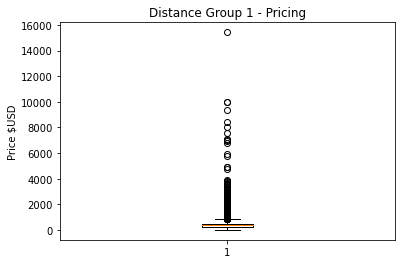

Values below -156.5 could be outliers.
Values above 871.5 could be outliers.


0.9707270179759608

In [7]:
# Example outlier plot of reaction times
dgroup_1_fare = dgroup_1['ITIN_FARE']
fig1, ax1 = plt.subplots()
ax1.set_title('Distance Group 1 - Pricing')
ax1.set_ylabel('Price $USD')
ax1.boxplot(dgroup_1_fare)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_1 = dgroup_1_fare.quantile([.25,.5,.75])
lowerq_1 = quartiles_1[0.25]
upperq_1 = quartiles_1[0.75]
iqr_1 = upperq_1-lowerq_1

lower_bound_1 = lowerq_1 - (1.5*iqr_1)
upper_bound_1 = upperq_1 + (1.5*iqr_1)
print(f"Values below {lower_bound_1} could be outliers.")
print(f"Values above {upper_bound_1} could be outliers.")

number_over_1 = dgroup_1.loc[dgroup_1['ITIN_FARE'] > upper_bound_1].count()
number_within_1 = dgroup_1.loc[dgroup_1['ITIN_FARE'] <= upper_bound_1].count()
number_total_1 = number_over_1[0] + number_within_1[0]

percentage_within_1 = number_within_1[0] / number_total_1
percentage_within_1

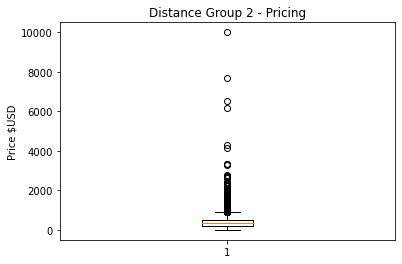

Values below -209.5 could be outliers.
Values above 906.5 could be outliers.
0.9738871425375858 of the data is within the IQR boundaries for the Distance Group


In [8]:
dgroup_2_fare = dgroup_2['ITIN_FARE']
fig2, ax2 = plt.subplots()
ax2.set_title('Distance Group 2 - Pricing')
ax2.set_ylabel('Price $USD')
ax2.boxplot(dgroup_2_fare)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_2 = dgroup_2_fare.quantile([.25,.5,.75])
lowerq_2 = quartiles_2[0.25]
upperq_2 = quartiles_2[0.75]
iqr_2 = upperq_2-lowerq_2

lower_bound_2 = lowerq_2 - (1.5*iqr_2)
upper_bound_2 = upperq_2 + (1.5*iqr_2)
print(f"Values below {lower_bound_2} could be outliers.")
print(f"Values above {upper_bound_2} could be outliers.")

number_over_2 = dgroup_2.loc[dgroup_2['ITIN_FARE'] > upper_bound_2].count()
number_within_2 = dgroup_2.loc[dgroup_2['ITIN_FARE'] <= upper_bound_2].count()
number_total_2 = number_over_2[0] + number_within_2[0]

percentage_within_2 = number_within_2[0] / number_total_2
print(f"{percentage_within_2} of the data is within the IQR boundaries for the Distance Group")

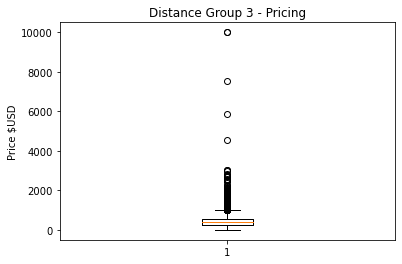

Values below -216.0 could be outliers.
Values above 1016.0 could be outliers.


0.9729838518728986

In [9]:
dgroup_3_fare = dgroup_3['ITIN_FARE']
fig3, ax3 = plt.subplots()
ax3.set_title('Distance Group 3 - Pricing')
ax3.set_ylabel('Price $USD')
ax3.boxplot(dgroup_3_fare)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_3 = dgroup_3_fare.quantile([.25,.5,.75])
lowerq_3 = quartiles_3[0.25]
upperq_3 = quartiles_3[0.75]
iqr_3 = upperq_3-lowerq_3

lower_bound_3 = lowerq_3 - (1.5*iqr_3)
upper_bound_3 = upperq_3 + (1.5*iqr_3)
print(f"Values below {lower_bound_3} could be outliers.")
print(f"Values above {upper_bound_3} could be outliers.")

number_over_3 = dgroup_3.loc[dgroup_3['ITIN_FARE'] > upper_bound_3].count()
number_within_3 = dgroup_3.loc[dgroup_3['ITIN_FARE'] <= upper_bound_3].count()
number_total_3 = number_over_3[0] + number_within_3[0]

percentage_within_3 = number_within_3[0] / number_total_3
percentage_within_3

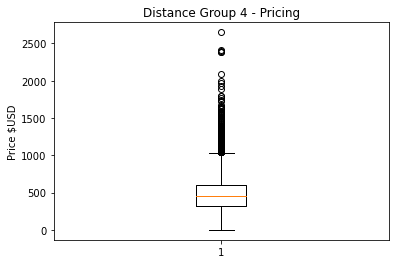

Values below -115.0 could be outliers.
Values above 1037.0 could be outliers.


0.9564171926660655

In [10]:
dgroup_4_fare = dgroup_4['ITIN_FARE']
fig4, ax4 = plt.subplots()
ax4.set_title('Distance Group 4 - Pricing')
ax4.set_ylabel('Price $USD')
ax4.boxplot(dgroup_4_fare)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_4 = dgroup_4_fare.quantile([.25,.5,.75])
lowerq_4 = quartiles_4[0.25]
upperq_4 = quartiles_4[0.75]
iqr_4 = upperq_4-lowerq_4

lower_bound_4 = lowerq_4 - (1.5*iqr_4)
upper_bound_4 = upperq_4 + (1.5*iqr_4)
print(f"Values below {lower_bound_4} could be outliers.")
print(f"Values above {upper_bound_4} could be outliers.")

number_over_4 = dgroup_4.loc[dgroup_4['ITIN_FARE'] > upper_bound_4].count()
number_within_4 = dgroup_4.loc[dgroup_4['ITIN_FARE'] <= upper_bound_4].count()
number_total_4 = number_over_4[0] + number_within_4[0]

percentage_within_4 = number_within_4[0] / number_total_4
percentage_within_4

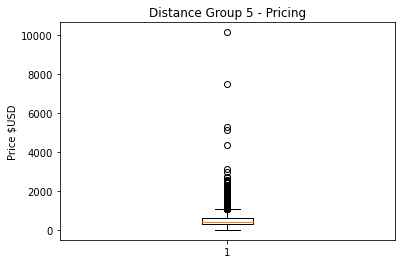

Values below -194.0 could be outliers.
Values above 1070.0 could be outliers.


0.9662656791814718

In [11]:
dgroup_5_fare = dgroup_5['ITIN_FARE']
fig5, ax5 = plt.subplots()
ax5.set_title('Distance Group 5 - Pricing')
ax5.set_ylabel('Price $USD')
ax5.boxplot(dgroup_5_fare)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_5 = dgroup_5_fare.quantile([.25,.5,.75])
lowerq_5 = quartiles_5[0.25]
upperq_5 = quartiles_5[0.75]
iqr_5 = upperq_5-lowerq_5

lower_bound_5 = lowerq_5 - (1.5*iqr_5)
upper_bound_5 = upperq_5 + (1.5*iqr_5)
print(f"Values below {lower_bound_5} could be outliers.")
print(f"Values above {upper_bound_5} could be outliers.")

number_over_5 = dgroup_5.loc[dgroup_5['ITIN_FARE'] > upper_bound_5].count()
number_within_5 = dgroup_5.loc[dgroup_5['ITIN_FARE'] <= upper_bound_5].count()
number_total_5 = number_over_5[0] + number_within_5[0]

percentage_within_5 = number_within_5[0] / number_total_5
percentage_within_5

In [12]:
dgroup_1_revised = dgroup_1.loc[dgroup_1['ITIN_FARE'] <= upper_bound_1]
dgroup_2_revised = dgroup_2.loc[dgroup_2['ITIN_FARE'] <= upper_bound_2]
dgroup_3_revised = dgroup_3.loc[dgroup_3['ITIN_FARE'] <= upper_bound_3]
dgroup_4_revised = dgroup_4.loc[dgroup_4['ITIN_FARE'] <= upper_bound_4]
dgroup_5_revised = dgroup_5.loc[dgroup_5['ITIN_FARE'] <= upper_bound_5]

In [13]:
dgroup_1_fare_revised = dgroup_1_revised['ITIN_FARE']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_r1 = dgroup_1_fare_revised.quantile([.33,.66])
lowerq_r1 = quartiles_r1[0.33]
upperq_r1 = quartiles_r1[0.66]

print(f"Anything under {lowerq_r1} is considered a low fare")
print(f"Anything between {lowerq_r1} and {upperq_r1} is considered a moderate fare")
print(f"Anything over {upperq_r1} is consider a high fare")

Anything under 262.0 is considered a low fare
Anything between 262.0 and 417.0 is considered a moderate fare
Anything over 417.0 is consider a high fare


In [14]:
dgroup_2_fare_revised = dgroup_2_revised['ITIN_FARE']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_r2 = dgroup_2_fare_revised.quantile([.33,.66])
lowerq_r2 = quartiles_r2[0.33]
upperq_r2 = quartiles_r2[0.66]

print(f"Anything under {lowerq_r2} is considered a low fare")
print(f"Anything between {lowerq_r2} and {upperq_r2} is considered a reasonable fare")
print(f"Anything over {upperq_r2} is consider a high fare")

Anything under 247.0 is considered a low fare
Anything between 247.0 and 410.0 is considered a reasonable fare
Anything over 410.0 is consider a high fare


In [15]:
dgroup_3_fare_revised = dgroup_3_revised['ITIN_FARE']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_r3 = dgroup_3_fare_revised.quantile([.33,.66])
lowerq_r3 = quartiles_r3[0.33]
upperq_r3 = quartiles_r3[0.66]

print(f"Anything under {lowerq_r3} is considered a low fare")
print(f"Anything between {lowerq_r3} and {upperq_r3} is considered a reasonable fare")
print(f"Anything over {upperq_r3} is consider a high fare")

Anything under 291.0 is considered a low fare
Anything between 291.0 and 471.0 is considered a reasonable fare
Anything over 471.0 is consider a high fare


In [16]:
dgroup_4_fare_revised = dgroup_4_revised['ITIN_FARE']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_r4 = dgroup_4_fare_revised.quantile([.33,.66])
lowerq_r4 = quartiles_r4[0.33]
upperq_r4 = quartiles_r4[0.66]

print(f"Anything under {lowerq_r4} is considered a low fare")
print(f"Anything between {lowerq_r4} and {upperq_r4} is considered a reasonable fare")
print(f"Anything over {upperq_r4} is consider a high fare")

Anything under 363.0 is considered a low fare
Anything between 363.0 and 525.0 is considered a reasonable fare
Anything over 525.0 is consider a high fare


In [17]:
dgroup_5_fare_revised = dgroup_5_revised['ITIN_FARE']

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_r5 = dgroup_5_fare_revised.quantile([.33,.66])
lowerq_r5 = quartiles_r5[0.33]
upperq_r5 = quartiles_r5[0.66]

print(f"Anything under {lowerq_r5} is considered a low fare")
print(f"Anything between {lowerq_r5} and {upperq_r5} is considered a reasonable fare")
print(f"Anything over {upperq_r5} is consider a high fare")

Anything under 325.0 is considered a low fare
Anything between 325.0 and 505.0 is considered a reasonable fare
Anything over 505.0 is consider a high fare


In [18]:
final_df = dgroup_1_revised.append(dgroup_2_revised).append(dgroup_3_revised).append(dgroup_4_revised).append(dgroup_5_revised)
final_df

,COUPONS_x,QUARTER,DEST,TICKET_CARRIER,OPERATING_CARRIER,REPORTING_CARRIER,PASSENGERS,FARE_CLASS,DISTANCE_GROUP,ROUNDTRIP,ITIN_FARE,BULK_FARE,MILES_FLOWN
0,6,1,ATL,DL,DL,9E,1.0,X,1,1.0,581.0,0.0,1304.0
1,4,1,ATL,DL,DL,9E,1.0,Y,1,1.0,11.0,0.0,1002.0
2,4,1,ATL,DL,DL,9E,2.0,X,1,1.0,315.0,0.0,1002.0
3,4,1,ATL,DL,DL,9E,1.0,X,1,1.0,333.0,0.0,1002.0
4,4,1,ATL,DL,DL,9E,1.0,X,1,1.0,337.0,0.0,1002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327478,3,4,SFO,UA,UA,YV,1.0,Y,5,0.0,493.0,0.0,2853.0
328751,2,4,SFO,UA,UA,YX,1.0,Y,5,0.0,560.0,0.0,2816.0
329170,2,4,LAX,AA,AA,YX,1.0,X,5,0.0,166.0,0.0,2670.0
329171,2,4,LAX,DL,DL,YX,1.0,X,5,0.0,264.0,0.0,2670.0


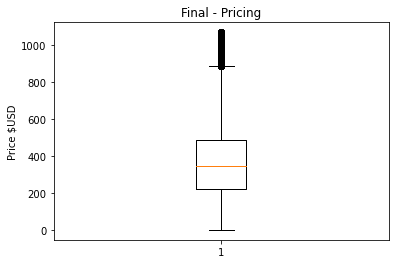

Prices under 266.0 should be Low Prices
Prices above 431.0 should be High Prices
Prices between 266.0 and 431.0 should be Average Prices


In [19]:
final_fare = final_df['ITIN_FARE']
fig6, ax6 = plt.subplots()
ax6.set_title('Final - Pricing')
ax6.set_ylabel('Price $USD')
ax6.boxplot(final_fare)
plt.show()

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_f = final_fare.quantile([.33,.66])
lowerq_f = quartiles_f[0.33]
upperq_f = quartiles_f[0.66]
iqr_f = upperq_f-lowerq_f

lower_bound_f = lowerq_f - (1.5*iqr_f)
upper_bound_f = upperq_f + (1.5*iqr_f)
#print(f"Values below {lower_bound_5} could be outliers.")
#print(f"Values above {upper_bound_5} could be outliers.")
print(f"Prices under {lowerq_f} should be Low Prices")
print(f"Prices above {upperq_f} should be High Prices")
print(f"Prices between {lowerq_f} and {upperq_f} should be Average Prices")

In [ ]:
distance_fare = final_df['ITIN_FARE']
distance_fare

In [ ]:
#distance_fare_data['DISTANCE_GROUP'].max()

In [ ]:
filtered_dattta = []
# Distance Groups are in 500  miles intervals
for fare in distance_fare:
    if fare < 250:
        filtered_dattta.append('Low Fare')
    elif fare > 500:
        filtered_dattta.append('High Fare')
    else:
        filtered_dattta.append('Average Fare')
   

In [ ]:
filtered_dattta

In [ ]:
final_df["Price_Bins"] = filtered_dattta

In [ ]:
final_df.head()

In [ ]:
# Defined independent (X) variables and dependent variable (y) for the model

X = final_df.drop(columns=['ITIN_FARE', 'Price_Bins'])
y = final_df['Price_Bins']
print(X.shape,y.shape)
X

In [ ]:
#X_numerical = shrink_data[['YEAR','QUARTER','PASSENGERS','DISTANCE_GROUP','ITIN_GEO_TYPE','MILES_FLOWN']]
#X_categorical = shrink_data[['DEST','TICKET_CARRIER','FARE_CLASS']]
X_2 = pd.get_dummies(X)
X_2

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
#X_2 = X_categorical.apply(label_encoder.fit_transform)
yy = label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

#X_2

In [ ]:
encoded_y

In [ ]:
X_2['Price_Bin_Numerical'] = encoded_y

In [ ]:
sorted_corr = X_2[X_2.columns[0:]].corr()['Price_Bin_Numerical'][:].abs()

In [ ]:
sorted_corr

In [ ]:
sorted_corr.sort_values(ascending=False)

In [ ]:
sorted_corr.loc[sorted_corr > .05]

In [ ]:
sorted_corr.loc['COUPONS_x']

In [ ]:
X_3 = final_df[['COUPONS_x', 'PASSENGERS', 'ROUNDTRIP', 'MILES_FLOWN','TICKET_CARRIER']]

In [ ]:
X_4 = pd.get_dummies(X_3)
X_4

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_4, encoded_y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train_scaled = np.asarray(X_train_scaled)
y_train = np.asarray(y_train)
X_test_scaled = np.asarray(X_test_scaled)
y_test = np.asarray(y_test)

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
number_inputs = 14
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [ ]:
number_classes = 3
model.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    shuffle=True,
    #verbose=2
)

In [ ]:
model.save("neural_model_trained_d2.h5")